In [1]:
import pandas as pd
import datetime as dt
from datetime import timedelta, date
from datetime import datetime

In [2]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [50]:
data_yh = pd.read_csv("raw_data/MSFT_2021-12-19.csv")

In [51]:
df = data_yh[['Date', 'Open', 'Close', 'Low', 'High']]

In [52]:
df=df.rename(columns={'Date': 'ds', 'Open': 'y', 'Close': 'close', 'Low': 'low', 'High': 'high'})

In [45]:
df.head()

,ds,y,close,low,high
0,2017-01-03,62.790001,62.580002,62.130001,62.840000
1,2017-01-04,62.480000,62.299999,62.119999,62.750000
2,2017-01-05,62.189999,62.299999,62.029999,62.660000
3,2017-01-06,62.299999,62.840000,62.040001,63.150002
4,2017-01-09,62.759998,62.639999,62.540001,63.080002


In [53]:
df_test = df[680:]
df_train = df[0:680]

In [54]:
m = Prophet()
m.add_regressor('close')
m.add_regressor('low')
m.add_regressor('high')
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/ps306w/venvs/seeking_sigma/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.5631


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3425.63     0.0183959       11126.7           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3481.62    0.00628748       4666.73           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3490.19     0.0016445        2555.2      0.8846      0.8846      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3503.02   0.000991069       3702.99           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3507.37    0.00031717       1582.29           1           1      559   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

(770, 1)

In [48]:
df.shape

(680, 5)

In [55]:
forecast = m.predict(df_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/ps306w/venvs/seeking_sigma/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ps306w/venvs/seeking_sigma/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
67,2019-12-20,157.775827,157.175035,158.388182
68,2019-12-23,158.151451,157.529977,158.819817
69,2019-12-24,157.731377,157.123909,158.375110
70,2019-12-26,157.940181,157.335203,158.619273
71,2019-12-27,159.124234,158.521175,159.789035


In [56]:
forecast.shape

(72, 31)

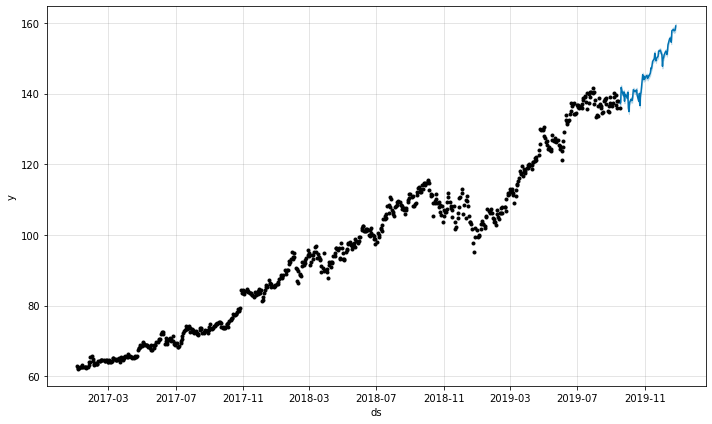

In [57]:
fig1 = m.plot(forecast)

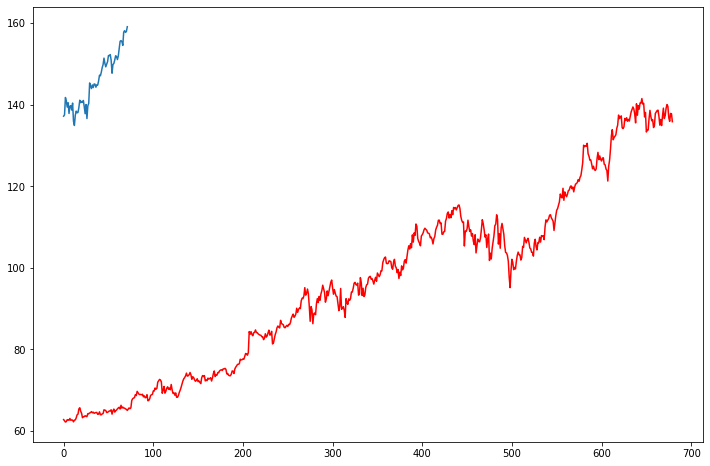

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(data_yh['Open'][0:680], color='r')
plt.plot(forecast['yhat'][0:680])


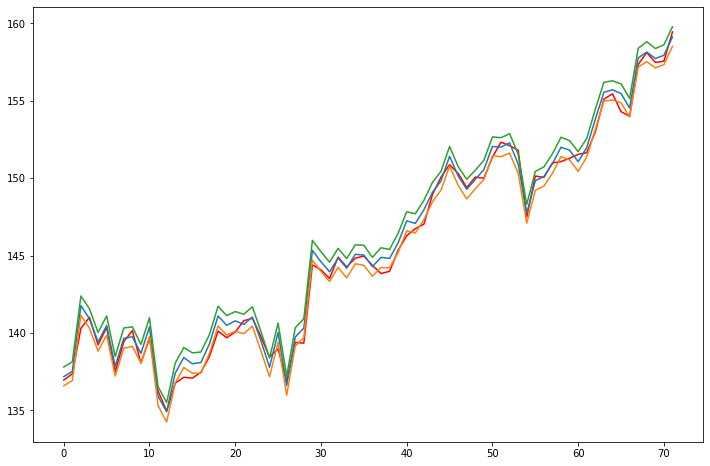

In [67]:
plt.figure(figsize=(12, 8))
plt.plot(df_test['y'], color='r')
plt.plot(forecast['yhat'])
plt.plot(forecast['yhat_lower'])
plt.plot(forecast['yhat_upper'])

In [62]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,close,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-09-17,91.976772,136.591357,137.802840,91.976772,91.976772,45.204672,45.204672,45.204672,-27.050514,...,5.529657,5.529657,5.529657,0.139604,0.139604,0.139604,0.0,0.0,0.0,137.181445
1,2019-09-18,91.980510,136.917997,138.135940,91.980510,91.980510,45.535102,45.535102,45.535102,-27.794669,...,5.474905,5.474905,5.474905,0.144431,0.144431,0.144431,0.0,0.0,0.0,137.515611
2,2019-09-19,91.984247,141.149322,142.389527,91.984247,91.984247,49.780811,49.780811,49.780811,-29.473951,...,5.454510,5.454510,5.454510,0.149562,0.149562,0.149562,0.0,0.0,0.0,141.765057
3,2019-09-20,91.987984,140.303876,141.560107,91.987984,91.987984,48.922642,48.922642,48.922642,-28.400526,...,5.489766,5.489766,5.489766,0.154874,0.154874,0.154874,0.0,0.0,0.0,140.910626
4,2019-09-23,91.999196,138.820129,140.032064,91.999196,91.999196,47.421319,47.421319,47.421319,-28.202961,...,5.486743,5.486743,5.486743,0.170374,0.170374,0.170374,0.0,0.0,0.0,139.420515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2019-12-20,92.328085,157.175035,158.388182,92.246221,92.410244,65.447742,65.447742,65.447742,-40.234514,...,5.489766,5.489766,5.489766,0.086408,0.086408,0.086408,0.0,0.0,0.0,157.775827
68,2019-12-23,92.339297,157.529977,158.819817,92.252613,92.425041,65.812154,65.812154,65.812154,-40.234514,...,5.486743,5.486743,5.486743,0.085270,0.085270,0.085270,0.0,0.0,0.0,158.151451
69,2019-12-24,92.343035,157.123909,158.375110,92.254573,92.429454,65.388343,65.388343,65.388343,-40.214759,...,5.529657,5.529657,5.529657,0.082210,0.082210,0.082210,0.0,0.0,0.0,157.731377
70,2019-12-26,92.350509,157.335203,158.619273,92.258767,92.439378,65.589672,65.589672,65.589672,-41.064272,...,5.454510,5.454510,5.454510,0.072775,0.072775,0.072775,0.0,0.0,0.0,157.940181


In [66]:
df_test=df_test.reset_index()